In [1]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot

In [2]:
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

In [3]:
abalone = pd.read_csv(target_url, header = None, prefix = "V")

In [4]:
abalone.columns = ['Sex', 'Lenght', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [5]:
print(abalone.head())
print(abalone.tail())

  Sex  Lenght  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
     Sex  Lenght  Diameter  Height  Whole weight  Shucked weight  \
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.

In [6]:
summary = abalone.describe()
print(summary)

            Lenght     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [8]:
array = abalone.iloc[:, 1:9].values

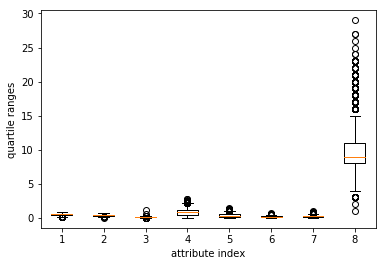

In [9]:
boxplot(array)
plot.xlabel("attribute index")
plot.ylabel("quartile ranges")
show()

#### the last column (rings) is out of scale with the rest. remove and replot ####

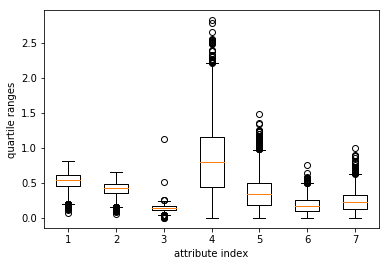

In [10]:
array2 = abalone.iloc[:, 1:8].values
boxplot(array2)
plot.xlabel("attribute index")
plot.ylabel("quartile ranges")
plot.show()

#### removing is ok but renormalizing generalizes better. It is common and desirable for other operations, e.g., k-means/k-nearest. ####

In [23]:
abaloneNormalized = abalone.iloc[:,1:9]

In [24]:
for i in range(8):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
abaloneNormalized.iloc[:, i:(i+1)] = (abaloneNormalized.iloc[:,i:(i+1)] - mean) / sd

In [25]:
array3 = abaloneNormalized.values

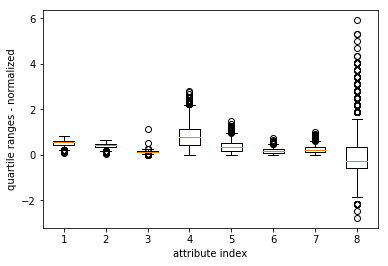

In [26]:
boxplot(array3)
plot.xlabel("attribute index")
plot.ylabel("quartile ranges - normalized")
show()

### Parallel Coordinates for Regression Problems ###

In [27]:
from math import exp

In [28]:
summary = abalone.describe()
minRings = summary.iloc[3,7]
maxRings = summary.iloc[7,7]
nrows = len(abalone.index)

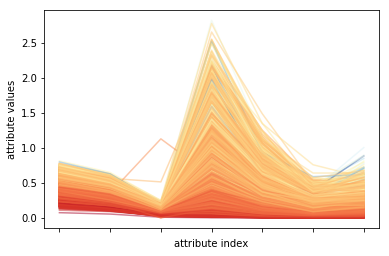

In [33]:
for i in range(nrows):
    dataRow = abalone.iloc[i, 1:8]
    labelColor = (abalone.iloc[i, 8] - minRings) / (maxRings - minRings)
    dataRow.plot(color = plot.cm.RdYlBu(labelColor), alpha = 0.5)
plot.xlabel("attribute index")
plot.ylabel(("attribute values"))
plot.show()

#### renormalizing using mean and standard variation, then compress with logit function. ####

In [35]:
meanRings = summary.iloc[1,7]
sdRings = summary.iloc[2,7]

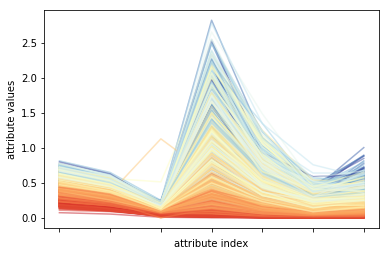

In [38]:
for i in range(nrows):
    dataRow = abalone.iloc[i, 1:8]
    normTarget = (abalone.iloc[i, 8] - meanRings) / sdRings
    labelColor = 1.0 / (1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha = 0.5)
plot.xlabel("attribute index")
plot.ylabel("attribute values")
plot.show()

### Correlation Heat Map for Regression ###

In [39]:
corMat = DataFrame(abalone.iloc[:, 1:9].corr())
print(corMat)

                  Lenght  Diameter    Height  Whole weight  Shucked weight  \
Lenght          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Lenght                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

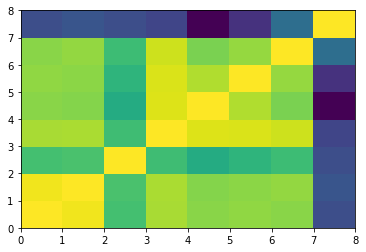

In [40]:
plot.pcolor(corMat)
plot.show()